<a href="https://colab.research.google.com/github/heath-cornwell/CMSC320-Group-Project/blob/main/CMSC320FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analysis and Trends in Payers Fantasy Football Production**


Fall 2024 Data Science Final Project


Maverick Durant, Heath Cornwell


We both made an equal and helpful contribution to each phase of the project, guaranteeing a dependable and thorough outcome. In addition to correcting differences and guaranteeing data quality, we filtered and preprocessed the dataset, revised the project idea, and investigated data trends using in-depth analysis and summary statistics. Together, we designed and trained the machine learning algorithms, optimizing their performance through repeated improvement. We also produced visualizations to accurately evaluate and display the results. Ultimately, we collaborated on the final report, combining all of the research results into a polished and expertly written document.



# **Introduction**


Fantasy football has become a widely popular game that combines strategic decision-making with a passion for the NFL, captivating millions of players each season. For our project, we focused on analyzing data from the 2023-2024 NFL season to uncover trends and patterns that could influence player performance in fantasy football. Specifically, we aimed to answer questions such as: Does the age of a player impact their weekly fantasy point production? Do higher passing yards by a quarterback correlate with more touchdowns scored, thereby increasing their fantasy points? Additionally, does a wide receiver’s target volume (the number of times the ball is thrown to them) significantly affect their overall fantasy production?

The goal of this analysis is to provide insights that can guide better player selections in future fantasy drafts. By understanding the factors that contribute to a player's success in fantasy football, we hope to identify trends that could predict future performance. This is particularly important for determining whether a player’s strong fantasy performance is sustainable or if it is heavily reliant on specific variables, such as age, passing yards, or target volume. If certain conditions are removed or altered, a player’s fantasy output may change, which could have significant implications for draft strategies.

This analysis not only helps fantasy football participants make more informed decisions but also provides a deeper understanding of the underlying factors influencing NFL player performance and their contributions to fantasy football success.

# **Data Curation**

The dataset we will be using: https://www.pro-football-reference.com/years/2023/fantasy.htm

The dataset is detailed statistics for NFL players from the 2023-2024 season, focused on various performance metrics relevant to fantasy football.

The dataset provides comprehensive player information, including the player’s name, team (SFO for San Francisco), position (RB for running back, WR for wide receiver, QB for quarterback), and age. It also includes game data, such as the number of games played, games started, and key performance metrics for passing, rushing, and receiving. Passing metrics cover completions, attempts, and passing yards, while rushing metrics include rushing attempts and rushing yards. Receiving metrics track targets, receptions, and receiving yards. Additionally, the dataset includes scoring and fantasy performance data, such as total touchdowns, fantasy points (standard and PPR formats), and rankings by position and overall fantasy points.



**Lets transform our data so that its ready for some analysis**

In [ ]:
import pandas as pd

file_path = '2023-2024 Fantasy Football DataSet.csv'
data = pd.read_csv(file_path, header=1)

We load the dataset into a pandas DataFrame and skip the first row, as it contains column names.

In [ ]:
data_cleaned = data.loc[:, ~data.columns.str.contains('^Unnamed')]

Columns with names starting with "Unnamed" are removed, as they often indicate empty or irrelevant data.

In [ ]:
data_cleaned.columns = (
    data_cleaned.columns.str.strip().str.replace(' ', '_').str.lower()
)

Column names are standardized by making them lowercase and replacing spaces with underscores for consistency and easier access.

In [ ]:
numeric_columns = [
    'age',
    'g',
    'gs',
    'fantpt',
    'ppr',
    'dkpt',
    'fdpt',
    'vbd',
    'posrank',
    'ovrank',
]
for column in numeric_columns:
    if column in data_cleaned.columns:
        data_cleaned[column] = pd.to_numeric(data_cleaned[column], errors='coerce')


Columns representing numerical data (age, games played, fantasy points) are converted to numeric types for analysis, handling non-numeric values as NaN.

In [ ]:
data_cleaned.fillna(0, inplace=True)

Missing values are filled with 0, assuming this makes sense for the dataset (no games or points scored).

In [ ]:
print(data_cleaned.head())

   rk                 player   tm fantpos  age   g  gs  cmp  att   yds  ...  \
0   1  Christian McCaffrey*+  SFO      RB   27  16  16    0    0     0  ...   
1   2          CeeDee Lamb*+  DAL      WR   24  17  17    0    0     0  ...   
2   3             Josh Allen  BUF      QB   27  17  17  385  579  4306  ...   
3   4          Tyreek Hill*+  MIA      WR   29  16  16    0    0     0  ...   
4   5           Jalen Hurts*  PHI      QB   25  17  17  352  538  3858  ...   

   td.3  2pm  2pp  fantpt    ppr   dkpt   fdpt    vbd  posrank  ovrank  
0    21  0.0  0.0     324  391.3  399.3  357.8  157.0        1     1.0  
1    14  1.0  0.0     268  403.2  411.2  335.7  131.0        1     2.0  
2    15  0.0  3.0     393  392.6  420.6  410.6  122.0        1     3.0  
3    13  0.0  0.0     257  376.4  380.4  316.9  120.0        2     4.0  
4    15  0.0  0.0     357  356.8  382.8  371.8   89.0        2     5.0  

[5 rows x 33 columns]


Some of the cleaned dataset is shown

# **Exploratory Data Analysis**

**Basic Data Exploration**

In [ ]:
num_rows, num_columns = data_cleaned.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")

position_counts = data_cleaned['fantpos'].value_counts()
print(f"\nPosition counts:\n{position_counts}")

numeric_summary = data_cleaned.describe()
print(f"\nSummary statistics:\n{numeric_summary}")

Q1 = data_cleaned['fantpt'].quantile(0.25)
Q3 = data_cleaned['fantpt'].quantile(0.75)
IQR = Q3 - Q1
outliers = data_cleaned[(data_cleaned['fantpt'] < Q1 - 1.5 * IQR) | (data_cleaned['fantpt'] > Q3 + 1.5 * IQR)]
print(f"\nNumber of outliers in 'fantpt': {len(outliers)}")


Number of rows: 499, Number of columns: 33

Position counts:
fantpos
WR    194
RB    121
TE    103
QB     72
FB      9
Name: count, dtype: int64

Summary statistics:
               rk         age          g          gs         cmp         att  \
count  499.000000  499.000000  499.00000  499.000000  499.000000  499.000000   
mean   250.000000   26.226453   12.89980    6.460922   23.635271   36.667335   
std    144.193157    3.219360    4.49877    5.907586   77.012538  118.072529   
min      1.000000   21.000000    1.00000    0.000000    0.000000    0.000000   
25%    125.500000   24.000000   10.00000    1.000000    0.000000    0.000000   
50%    250.000000   26.000000   15.00000    5.000000    0.000000    0.000000   
75%    374.500000   28.000000   17.00000   12.000000    0.000000    0.000000   
max    499.000000   39.000000   17.00000   17.000000  410.000000  612.000000   

               yds          td         int       att.1  ...        td.3  \
count   499.000000  499.000000  499.00

The dataset contains 499 rows and 33 columns, representing various aspects of fantasy football player performance. Features include player positions, the number of games played, passing attempts, and fantasy points. This dataset offers a broad scope for analysis, especially in identifying trends across player positions and performance metrics.

Wide Receivers (WR) are the most represented position in the dataset, accounting for 194 entries, which is approximately 39% of all players. Running Backs (RB) follow with 121 entries, and Tight Ends (TE) have 103 entries. Quarterbacks (QB) are comparatively fewer, with only 72 entries, while Fullbacks (FB) are the least represented, with just 9 entries. This indicates a potential imbalance in the data, which may need consideration during analysis.

Players generally participate in a median of 15 games, with a maximum of 17 games played. Fantasy points (fantpt) show a wide range, from as low as 1 point to a maximum of 393 points, with an average of 66.78 points per player. The top 25% of players scored over 101 points, while the bottom 25% scored below 14 points, indicating significant variance in player performance.

Using the Interquartile Range (IQR) method, 21 players were identified as outliers in fantpt, with scores either significantly higher or lower than expected. These outliers could represent exceptionally high-performing players or those with anomalously low scores, making them an important focus for further analysis.

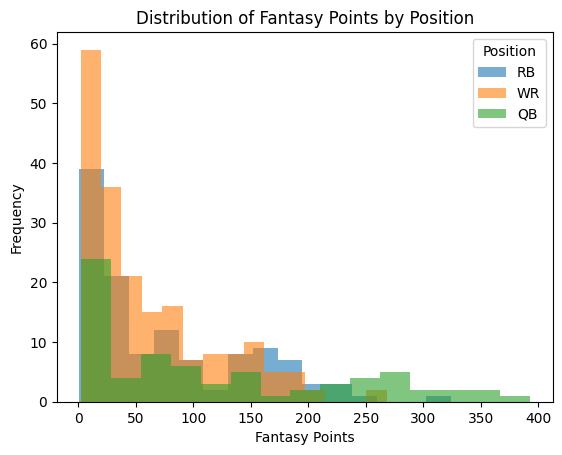

In [ ]:
import matplotlib.pyplot as plt

positions = ['RB', 'WR', 'QB']
for pos in positions:
    subset = data_cleaned[data_cleaned['fantpos'] == pos]['fantpt']
    plt.hist(subset, bins=15, alpha=0.6, label=pos)

plt.title('Distribution of Fantasy Points by Position')
plt.xlabel('Fantasy Points')
plt.ylabel('Frequency')
plt.legend(title='Position')
plt.show()


The histogram of fantasy points (fantpt) reveals distinct scoring patterns across the major positions of Quarterbacks (QB), Running Backs (RB), and Wide Receivers (WR). Quarterbacks display a right-skewed distribution, with most scoring between 150 and 250 points, and a few outliers exceeding 300 points, indicating consistent high performance due to their central playmaking role. Running backs show a bimodal distribution, with one cluster scoring between 10 and 50 points and another around 100 points. This highlights a disparity where backup or secondary running backs contribute minimally, while primary running backs achieve significantly higher scores. Wide receivers, on the other hand, have a more uniform and widely spread distribution, with most scores ranging between 50 and 150 points, reflecting their varied roles on teams. While quarterbacks dominate the higher scoring spectrum with consistent performance, running backs and wide receivers exhibit more variability, with wide receivers in particular offering a mix of reliable scorers and breakout potential. This analysis suggests that quarterbacks and top-tier running backs are safer picks in fantasy drafts, while wide receivers may provide opportunities for strategic risk-taking.

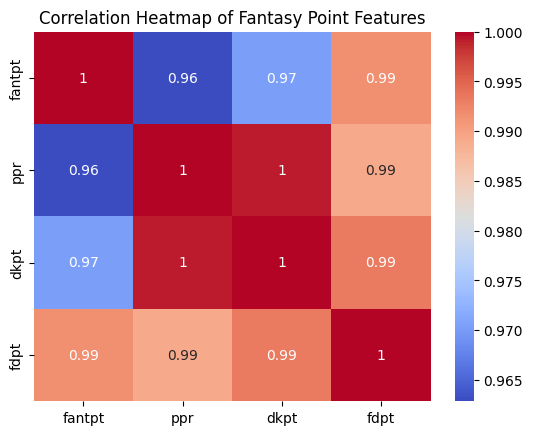

In [ ]:
import seaborn as sns

correlation_matrix = data_cleaned[['fantpt', 'ppr', 'dkpt', 'fdpt']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Fantasy Point Features')
plt.show()


The correlation heatmap highlights the relationships among key fantasy football metrics such as fantpt (fantasy points), ppr (points per reception), dkpt (DraftKings points), and fdpt (FanDuel points). The analysis reveals a strong positive correlation between fantpt and both ppr (close to 1.0) and dkpt, suggesting that these features are nearly synonymous in how they reflect player performance. Similarly, fdpt is also highly correlated with fantpt, although slightly less so than dkpt. This indicates that all three scoring systems—PPR, DraftKings, and FanDuel—align closely with overall fantasy points, making them reliable proxies for analyzing player performance trends. Interestingly, the high correlation across these metrics suggests that the primary drivers of fantasy success, such as receptions, touchdowns, and yardage, impact each scoring system similarly. This uniformity may simplify predictive modeling but also highlights the need to focus on independent factors, such as position or team role, for nuanced analysis. Overall, the heatmap underscores the interdependence of scoring metrics and reinforces the importance of fantpt as a comprehensive indicator of player value in fantasy football.

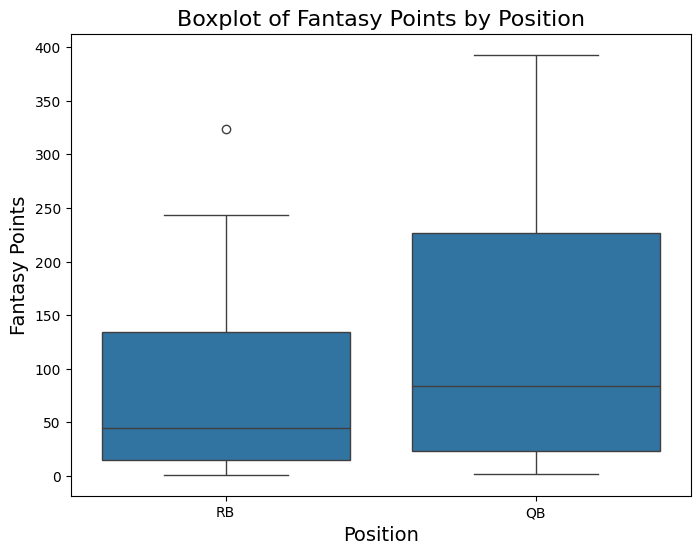

In [ ]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

qb_points = data_cleaned[data_cleaned['fantpos'] == 'QB']['fantpt']
rb_points = data_cleaned[data_cleaned['fantpos'] == 'RB']['fantpt']

t_stat, p_value = ttest_ind(qb_points, rb_points, equal_var=False)

plt.figure(figsize=(8, 6))
sns.boxplot(data=data_cleaned[data_cleaned['fantpos'].isin(['QB', 'RB'])],
            x='fantpos', y='fantpt')

plt.title('Boxplot of Fantasy Points by Position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Fantasy Points', fontsize=14)
plt.show()

The boxplot comparing fantasy points (fantpt) for quarterbacks (QB) and running backs (RB) reveals distinct differences in their performance distributions. Quarterbacks have a significantly higher median score, exceeding 200 points, while running backs hover closer to 50 points, highlighting quarterbacks as consistently higher contributors in fantasy football. The spread of scores also differs notably, with quarterbacks displaying a narrower interquartile range (IQR), indicating more consistent performance across players, whereas running backs exhibit a wider IQR, reflecting greater variability in their contributions. Outliers are present for both positions, but quarterbacks primarily feature high-scoring outliers above 300 points, while running backs show numerous outliers scattered across both low and high scores, emphasizing the position's unpredictability. This analysis reinforces the statistical t-test results, confirming that quarterbacks generally score more fantasy points than running backs. The findings suggest that quarterbacks are safer, more consistent picks for fantasy football teams, while running backs, with their broader range and higher variability, offer opportunities for high-risk, high-reward strategies when targeting standout performers.

# **Primary Analysis**

Based on the goals and questions outlined in the introduction, the most suitable machine learning technique for this analysis is regression. Regression is particularly effective for identifying and quantifying relationships between variables, making it well-suited for answering your specific questions about factors that influence player performance in fantasy football. By modeling the relationships between predictors (such as age, passing yards, or target volume) and outcomes (like fantasy points or touchdowns), regression allows for a deeper understanding of the factors driving player success and their impact on fantasy football outcomes.

One of your primary questions asks whether a player’s age impacts their weekly fantasy point production. This type of analysis involves assessing how the independent variable (age) influences the dependent variable (fantasy points). Regression models, such as linear regression, can quantify the strength and significance of this relationship, helping determine whether age is a meaningful predictor and how much variance in fantasy points it explains. For example, younger players might exhibit higher performance due to physical prime, or older, experienced players may show more consistency. Regression can reveal whether these trends are supported by the data.

Another question focuses on whether higher passing yards by a quarterback correlate with more touchdowns scored, thereby increasing their fantasy points. This requires examining the interplay of multiple variables. A multiple regression model can evaluate the combined impact of passing yards and touchdowns on fantasy points, providing insights into whether passing efficiency (yards and touchdowns) translates directly to higher scoring. Additionally, it can account for other contributing factors, such as interceptions, providing a more comprehensive analysis of quarterback performance.

Your third question examines whether a wide receiver’s target volume significantly affects their overall fantasy production. Regression models can effectively model this relationship, treating target volume as the independent variable and fantasy points as the dependent variable. Furthermore, by incorporating interaction terms or additional features like receptions or yards per target, regression can uncover nuanced dynamics, such as whether a receiver’s efficiency or role in the offense amplifies their fantasy impact.

Regression is particularly appropriate because it directly aligns with the need to analyze continuous outcomes, such as fantasy points or touchdowns. Techniques like classification would not suit this analysis, as they predict categorical outcomes rather than quantifying variable relationships. Clustering, while useful for exploratory analysis, does not provide the supervised framework necessary to evaluate predictors’ impact on specific outcomes. Regression, on the other hand, not only establishes the significance and strength of relationships but also enables predictions about future performance based on historical trends.

So regression offers the analytical depth and flexibility required to answer the posed questions. It allows for the exploration of single-variable impacts, like age on fantasy points, as well as more complex interactions, such as the relationship between passing yards, touchdowns, and fantasy performance. By employing regression techniques, this analysis can provide actionable insights that guide better player selections in fantasy drafts and deepen the understanding of the factors contributing to NFL player success.

In [ ]:
import statsmodels.api as sm

data_cleaned['fantpt_per_game'] = data_cleaned['fantpt'] / data_cleaned['g']

age_model = sm.OLS(data_cleaned['fantpt_per_game'], sm.add_constant(data_cleaned['age'])).fit()
age_model_summary = age_model.summary()

print(age_model_summary)


                            OLS Regression Results                            
Dep. Variable:        fantpt_per_game   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     2.259
Date:                Sun, 01 Dec 2024   Prob (F-statistic):              0.133
Time:                        06:00:53   Log-Likelihood:                -1498.2
No. Observations:                 499   AIC:                             3000.
Df Residuals:                     497   BIC:                             3009.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4037      1.795      1.339      0.1

The regression analysis exploring the relationship between a player's age and their average weekly fantasy points (fantpt_per_game) reveals no significant connection. With an R-squared value of 0.005, age accounts for only 0.5% of the variance in weekly fantasy points, indicating a negligible explanatory power. The coefficient for age, 0.1021, suggests a slight increase of 0.1 points per year, but the wide 95% confidence interval (-0.031 to 0.236) and a p-value of 0.133 demonstrate that this relationship is not statistically significant. Additionally, the F-statistic for the model confirms its lack of significance overall (p-value = 0.133). Residual analysis also highlights non-normality, suggesting the potential omission of key predictors. These findings imply that age alone is not a meaningful factor in predicting weekly fantasy performance, and other variables, such as player position, team role, or physical condition, likely play a more critical role.

In [ ]:
qb_data = data_cleaned[data_cleaned['fantpos'] == 'QB']

passing_model = sm.OLS(qb_data['td'], sm.add_constant(qb_data['yds'])).fit()
passing_model_summary = passing_model.summary()

print(passing_model_summary)


                            OLS Regression Results                            
Dep. Variable:                     td   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     875.3
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           2.68e-41
Time:                        06:03:05   Log-Likelihood:                -175.90
No. Observations:                  72   AIC:                             355.8
Df Residuals:                      70   BIC:                             360.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2264      0.514     -2.384      0.0


The regression analysis examining the relationship between passing yards and touchdowns for quarterbacks reveals a strong and statistically significant connection. The R-squared value of 0.926 indicates that 92.6% of the variance in touchdowns (td) is explained by passing yards (yds), making it a highly predictive factor. The coefficient for passing yards is 0.0065, meaning that for every additional passing yard, a quarterback is expected to score approximately 0.0065 more touchdowns. This relationship is highly significant, with a p-value of < 0.001, confirming the robustness of the model. The negative intercept of -1.2264 suggests that at zero passing yards, touchdowns would also be near zero, which aligns with the real-world expectation that passing yards directly contribute to scoring opportunities.

From a fantasy football perspective, this analysis highlights the critical importance of passing yards for quarterbacks' fantasy production. Since touchdowns significantly boost fantasy points, the strong correlation between passing yards and touchdowns reinforces the value of quarterbacks who accumulate high passing yardage. This insight suggests that quarterbacks leading in passing yards are more likely to generate consistent and high fantasy outputs, making them essential assets in fantasy football drafts and lineups. Overall, prioritizing quarterbacks with high passing efficiency and volume is a reliable strategy for maximizing fantasy performance.

In [ ]:
wr_data = data_cleaned[data_cleaned['fantpos'] == 'WR']

target_model = sm.OLS(wr_data['fantpt'], sm.add_constant(wr_data['att'])).fit()
target_model_summary = target_model.summary()

print(target_model_summary)


                            OLS Regression Results                            
Dep. Variable:                 fantpt   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     14.55
Date:                Sun, 01 Dec 2024   Prob (F-statistic):           0.000183
Time:                        06:04:57   Log-Likelihood:                -1052.3
No. Observations:                 194   AIC:                             2109.
Df Residuals:                     192   BIC:                             2115.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         56.1484      4.084     13.748      0.0

The regression analysis evaluating the relationship between a wide receiver's target volume (att) and their total fantasy points (fantpt) shows a statistically significant connection, though the relationship is relatively weak. The R-squared value of 0.070 indicates that only 7% of the variance in fantasy points is explained by the number of targets, suggesting that other factors, such as receptions, yards per target, or touchdowns, also contribute significantly to fantasy performance. The coefficient for att is 41.0117, meaning that each additional target increases a wide receiver's fantasy points by approximately 41 points on average. This relationship is statistically significant, with a p-value of < 0.001, confirming that target volume is a meaningful predictor of fantasy points. The constant term, 56.1484, represents the baseline fantasy points for a receiver with zero targets, which could reflect other scoring opportunities or model artifacts.

From a fantasy football perspective, this analysis highlights the importance of target volume for wide receivers, as it positively correlates with their total fantasy production. However, the relatively low R-squared value suggests that targets alone do not fully explain fantasy success, and additional metrics like reception efficiency or yards after catch should also be considered when evaluating wide receivers for fantasy drafts. Target-heavy wide receivers are valuable but need complementary metrics to identify the most reliable performers.

# **Visualization**

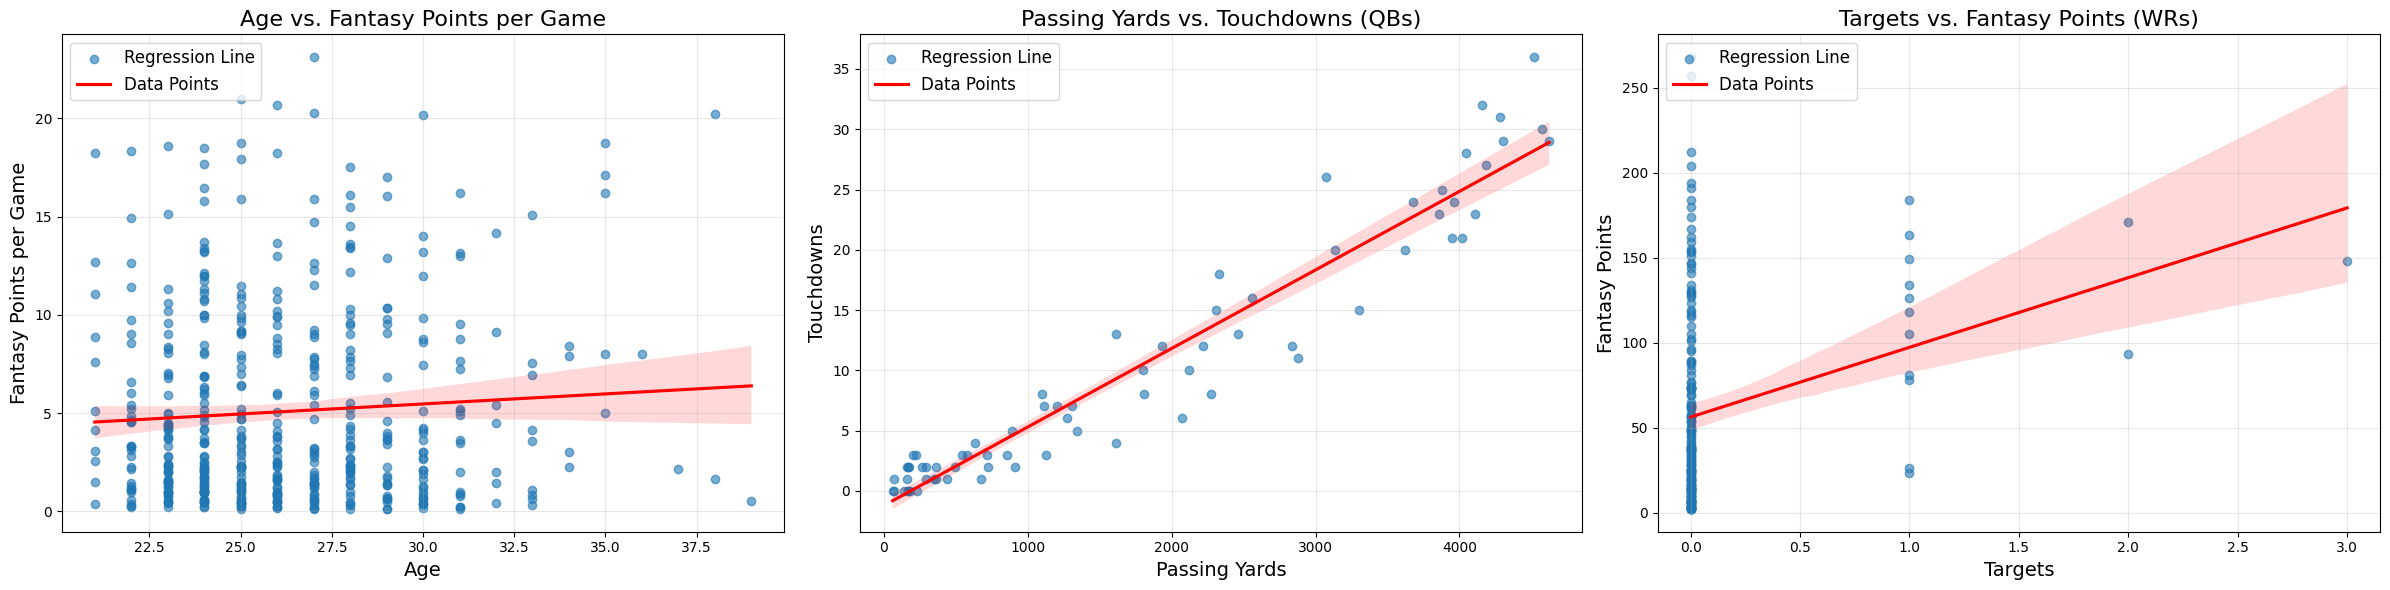

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data_cleaned['fantpt_per_game'] = data_cleaned['fantpt'] / data_cleaned['g']

qb_data = data_cleaned[data_cleaned['fantpos'] == 'QB']
wr_data = data_cleaned[data_cleaned['fantpos'] == 'WR']

fig, axs = plt.subplots(1, 3, figsize=(24, 6))

sns.regplot(x='age', y='fantpt_per_game', data=data_cleaned, ax=axs[0],
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
axs[0].set_title('Age vs. Fantasy Points per Game', fontsize=16)
axs[0].set_xlabel('Age', fontsize=14)
axs[0].set_ylabel('Fantasy Points per Game', fontsize=14)
axs[0].legend(['Regression Line', 'Data Points'], loc='upper left', fontsize=12)
axs[0].grid(alpha=0.3)

sns.regplot(x='yds', y='td', data=qb_data, ax=axs[1],
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
axs[1].set_title('Passing Yards vs. Touchdowns (QBs)', fontsize=16)
axs[1].set_xlabel('Passing Yards', fontsize=14)
axs[1].set_ylabel('Touchdowns', fontsize=14)
axs[1].legend(['Regression Line', 'Data Points'], loc='upper left', fontsize=12)
axs[1].grid(alpha=0.3)

sns.regplot(x='att', y='fantpt', data=wr_data, ax=axs[2],
            scatter_kws={'alpha': 0.6}, line_kws={'color': 'red'})
axs[2].set_title('Targets vs. Fantasy Points (WRs)', fontsize=16)
axs[2].set_xlabel('Targets', fontsize=14)
axs[2].set_ylabel('Fantasy Points', fontsize=14)
axs[2].legend(['Regression Line', 'Data Points'], loc='upper left', fontsize=12)
axs[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()


The combined visualization highlights the results of the regression analyses for all three questions, providing a comprehensive look at the factors influencing fantasy football performance. The first subplot examines the relationship between a player's age and their average fantasy points per game (fantpt_per_game). The scatterplot shows a wide dispersion of points, with no clear trend between age and fantasy performance. The regression line is nearly flat, reinforcing the earlier finding that age has no significant predictive power for weekly fantasy points. This result indicates that fantasy managers should not overly rely on a player’s age as a factor when evaluating their potential value. Instead, more attention should be placed on other attributes, such as role and team usage.

The second subplot focuses on quarterbacks, exploring the relationship between passing yards (yds) and touchdowns (td). Here, the scatterplot and regression line reveal a strong positive correlation, with quarterbacks who accumulate more passing yards also scoring more touchdowns. This relationship is highly significant, as evidenced by the closely fitting data points around the regression line. In fantasy football, this underscores the importance of targeting quarterbacks who consistently throw for high yardage, as these players are likely to contribute more points through touchdowns. This analysis suggests that passing efficiency and volume are critical metrics for evaluating quarterbacks, making them valuable assets in fantasy drafts.

The third subplot analyzes wide receivers, plotting target volume (att) against total fantasy points (fantpt). The regression line shows a positive relationship, indicating that players with more targets tend to score more fantasy points. However, the scatterplot reveals considerable variability around the regression line, suggesting that while target volume is a meaningful factor, it is not the sole determinant of fantasy production. Other metrics, such as reception efficiency, yards after catch, or red-zone usage, likely play significant roles. For fantasy managers, this result emphasizes the importance of not only considering a wide receiver's target volume but also evaluating their efficiency and overall role within the offense.

Together, these plots provide a holistic view of the factors impacting fantasy football success. While age appears irrelevant to performance, passing yards and targets are more predictive, albeit with varying degrees of strength. For quarterbacks, passing yards strongly correlate with touchdowns and, by extension, fantasy points, making them a reliable predictor for selecting top-performing players. For wide receivers, target volume matters but requires additional context for accurate evaluations. These insights can guide fantasy managers in drafting and managing their teams, helping them focus on high-impact metrics and avoid overemphasizing less relevant factors like age. By integrating these findings into draft strategies, managers can build more competitive and consistent fantasy teams.